# NetworkX Intro

Playing around with the lib for network visualization

- [Intro Docs](https://networkx.org/documentation/stable/tutorial.html#tutorial)
- [Drawing Details](https://networkx.org/documentation/stable/reference/drawing.html) -- not really intended as a graphing library but can pair up with matplotlib
- Google Graph data was retrieved from [Stanford's Graph Repo](https://snap.stanford.edu/data/web-Google.html)



In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.grid_2d_graph(2, 7)

for line in nx.generate_adjlist(G):
    print(line)

nx.write_edgelist(G, path="edgelist", delimiter=":")
H = nx.read_edgelist(path="edgelist", delimiter=":")

pos = nx.spring_layout(H, seed=42)
nx.draw(H, pos, with_labels=True)
plt.show()

In [22]:
# Read In Google Graph Data
from tqdm import tqdm

nodes = set() #to hold all of the unique nodes
edges = []

with open("web-Google.txt", "r") as f:
    l = f.readlines()
    #data is '\t' separated (NodeID-to-NodeID)

    # Construct DataStructs (actual data starts on line 4 in file, very big so subsetting)
    for line in tqdm(l[4:1000]):
        line = line.replace("\n", "")
        line = line.split("\t")
        edges.append(line) #list of all the relevant edges
        n1, n2 = line[0], line[1] #parse out nodes on line

        # Update Unique Nodes
        nodes.update([n1, n2])


# Add Directed Graph data to NetworkX
google = nx.DiGraph()
google.add_nodes_from(nodes) #from set in above (can add from any iterable)
google.add_edges_from(edges) #from list of lists (per directed edge pair) in above


 40%|███▉      | 2036628/5105039 [00:39<00:59, 51359.83it/s] 


KeyboardInterrupt: 

In [5]:
nodes
edges
len(nodes) #875,713 total unique nodes
len(edges) #5,105,039 total edges

996

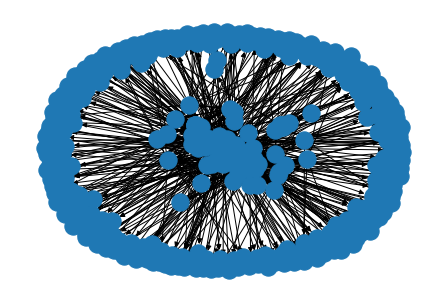

In [6]:
# Visualizing the Google Graph

nx.draw(google)

In [ ]:
# Generating a Random Graph
G = nx.erdos_renyi_graph(n=420, p=.07, seed=42)
nx.draw(G)
plt.show()